# Project

## Project Description
- Imitate the visual style of "cel shading" on images of people or things
    - Use Segmentation to detect objects
    - Use Edge Detection to find lines within said objects
    - Draw over the detected lines with thick, black lines to outline objects
    - Blur objects with a small kernel to artificially smooth and lower resolution of the objects
    - Further segment objects based on detected lines and contours to get object segments
    - Normalize light within segments by averaging the V-value after converting to HSV

## The Image

Random dude in a field

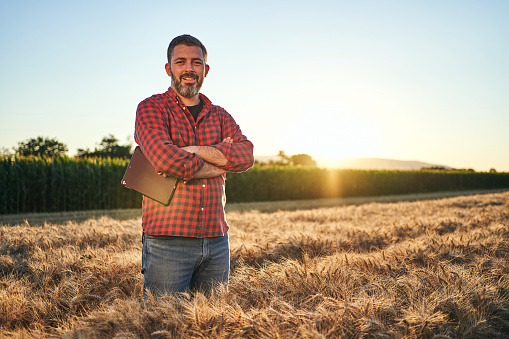

In [1]:
import torch
from torchvision import transforms
from PIL import Image, ImageChops
import numpy as np
import math
filename = 'data/image1.jpg'
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
# output_image = remove_object_pixels(model, input_image, ['background'], show_object_list=True, concat=True, scale=1)
display(input_image)

## Segmentation and Object Detection

In [2]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()

Using cache found in C:\Users\henky/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\henky\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\henky\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [3]:
from segmentation import get_mask, blur_object_pixels
from normalize_HSV import normalize_brightness, RGB_to_HSV, HSV_to_RGB, apply_mask


## Edge Detection

## Drawing over detected edges

## Smoothing objects with small kernel

#### Borrowing code from Practical Six for smoothing objects

#### Running the code

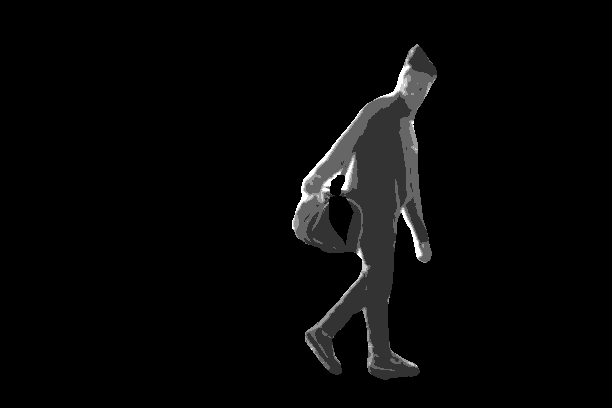

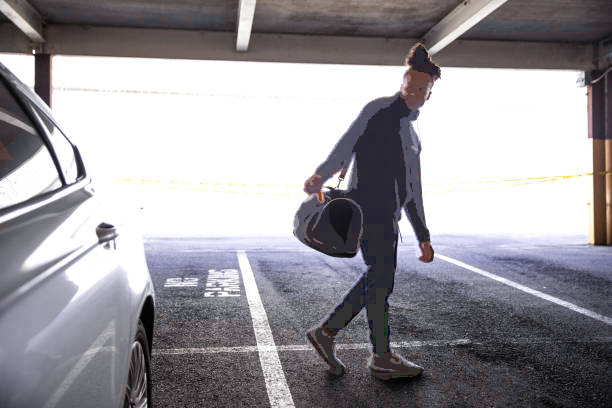

In [13]:
filename = 'data/image2.jpg'
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
input_image_blurred = blur_object_pixels(model, input_image, ['person'], sigma=5, show_object_list=False, concat=False, scale=1)
person_mask = get_mask(model, input_image_blurred, ['person'], sigma=5, show_object_list=False, concat=True, scale=1)
#display(person_mask)
ms = normalize_brightness(input_image_blurred, 6, person_mask)
#for m in ms.keys():
#    img = ms[m]
#    display(img)
img = ms["all"]
display(img)

masked = apply_mask(input_image, img)
display(masked)





In [16]:
from edge_detection import imfilter, gaussian_kernel, np2img, detect_edges
base = np.array(img)
blackimg = np2img(np.zeros(base.shape))
for key in ms.keys():
    if key!= "all":
        layer = ms[key]
        edges = detect_edges(layer, 50)
        Image.composite(img, blackimg, edges)
        #display(np2img(edges))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Segment objects based on detected lines and contours

## Normalize lighting via HSV-values